# 0.1 Imports

In [1]:
import pandas as pd
import numpy as np
pd.set_option("display.max_columns", None)

import matplotlib.pyplot as plt
import seaborn as sns

import os

import tensorflow as tf
from typing import Dict, List, Tuple, Sequence

# 1. Data Import & Cleaning

In [2]:
current_dir = os.getcwd()
relative_path = os.path.dirname(current_dir)
file_name = "raw_data/historical_weather_openmeteo_01011979-08122024.csv"

file_path = os.path.join(relative_path, file_name)

df = pd.read_csv(file_path, parse_dates=['date'])

In [3]:
df['datetime'] = pd.to_datetime(df['date'])  # Convert 'datetime' column to datetime format
df.set_index('datetime', inplace=True)

df['hour_sin'] = np.sin(2 * np.pi * df.index.hour / 24)
df['hour_cos'] = np.cos(2 * np.pi * df.index.hour / 24)

df['day_of_week_sin'] = np.sin(2 * np.pi * df.index.dayofweek / 7)
df['day_of_week_cos'] = np.cos(2 * np.pi * df.index.dayofweek / 7)

df['month_sin'] = np.sin(2 * np.pi * (df.index.month - 1) / 12)
df['month_cos'] = np.cos(2 * np.pi * (df.index.month - 1) / 12)

In [4]:
df = df.loc[df.index > '2000-01-01']

In [5]:
df['date'] = df['date'].dt.tz_localize(None) # remove the UTC

In [6]:
df.dtypes

date                             datetime64[ns]
temperature_2m                          float64
relative_humidity_2m                    float64
dew_point_2m                            float64
apparent_temperature                    float64
precipitation                           float64
rain                                    float64
snowfall                                float64
snow_depth                              float64
weather_code                            float64
pressure_msl                            float64
surface_pressure                        float64
cloud_cover                             float64
cloud_cover_low                         float64
cloud_cover_mid                         float64
cloud_cover_high                        float64
et0_fao_evapotranspiration              float64
vapour_pressure_deficit                 float64
wind_speed_10m                          float64
wind_speed_100m                         float64
wind_direction_10m                      

In [7]:
df.shape

(218615, 38)

In [8]:
df.tail(2)

,date,temperature_2m,relative_humidity_2m,dew_point_2m,apparent_temperature,precipitation,rain,snowfall,snow_depth,weather_code,pressure_msl,surface_pressure,cloud_cover,cloud_cover_low,cloud_cover_mid,cloud_cover_high,et0_fao_evapotranspiration,vapour_pressure_deficit,wind_speed_10m,wind_speed_100m,wind_direction_10m,wind_direction_100m,wind_gusts_10m,soil_temperature_0_to_7cm,soil_temperature_7_to_28cm,soil_temperature_28_to_100cm,soil_temperature_100_to_255cm,soil_moisture_0_to_7cm,soil_moisture_7_to_28cm,soil_moisture_28_to_100cm,soil_moisture_100_to_255cm,sunshine_duration,hour_sin,hour_cos,day_of_week_sin,day_of_week_cos,month_sin,month_cos
datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2024-12-08 22:00:00+00:00,2024-12-08 22:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.500000,0.866025,-0.781831,0.62349,-0.5,0.866025
2024-12-08 23:00:00+00:00,2024-12-08 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.258819,0.965926,-0.781831,0.62349,-0.5,0.866025


In [9]:
df.columns

Index(['date', 'temperature_2m', 'relative_humidity_2m', 'dew_point_2m',
       'apparent_temperature', 'precipitation', 'rain', 'snowfall',
       'snow_depth', 'weather_code', 'pressure_msl', 'surface_pressure',
       'cloud_cover', 'cloud_cover_low', 'cloud_cover_mid', 'cloud_cover_high',
       'et0_fao_evapotranspiration', 'vapour_pressure_deficit',
       'wind_speed_10m', 'wind_speed_100m', 'wind_direction_10m',
       'wind_direction_100m', 'wind_gusts_10m', 'soil_temperature_0_to_7cm',
       'soil_temperature_7_to_28cm', 'soil_temperature_28_to_100cm',
       'soil_temperature_100_to_255cm', 'soil_moisture_0_to_7cm',
       'soil_moisture_7_to_28cm', 'soil_moisture_28_to_100cm',
       'soil_moisture_100_to_255cm', 'sunshine_duration', 'hour_sin',
       'hour_cos', 'day_of_week_sin', 'day_of_week_cos', 'month_sin',
       'month_cos'],
      dtype='object')

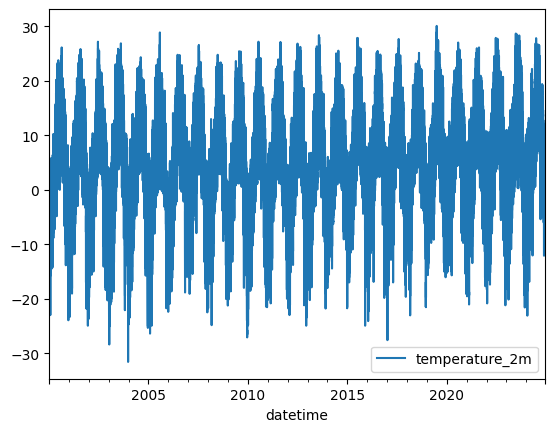

In [10]:
df.plot(y='temperature_2m');

In [11]:
df = df[df['date'] < '2024-12-08 00:00:00']
df = df.drop_duplicates()
df = df.dropna()

# 2. Dataset

In [12]:
correlation_matrix = df.corr()
temperature_corr = correlation_matrix['temperature_2m']
high_corr_features = temperature_corr[abs(temperature_corr) > 0.6]
print(high_corr_features)

temperature_2m                  1.000000
dew_point_2m                    0.905541
apparent_temperature            0.997655
et0_fao_evapotranspiration      0.604021
vapour_pressure_deficit         0.653545
soil_temperature_0_to_7cm       0.844117
soil_temperature_7_to_28cm      0.775256
soil_temperature_28_to_100cm    0.680303
month_cos                      -0.781164
Name: temperature_2m, dtype: float64


In [13]:
df = df.drop(columns='date')
df.shape

(217991, 37)

# 3. Folds

In [14]:
rows = df.shape[0]
days = rows/24
weeks = days/7
months = weeks/4
years = months/ 12
print(f'DS includes {rows} rows --> hours')
print(f'DS includes {days} --> days')
print(f'DS includes {weeks} --> weeks')
print(f'DS includes {months} --> months')
print(f'DS includes {years} --> years')

DS includes 217991 rows --> hours
DS includes 9082.958333333334 --> days
DS includes 1297.5654761904764 --> weeks
DS includes 324.3913690476191 --> months
DS includes 27.032614087301592 --> years


In [34]:
# Folds
FOLD_LENGTH = 217991      # each fold will have 1 years of data
FOLD_STRIDE = 1 # sliding half a year

# Temporal Train-Test split
TRAIN_TEST_RATIO = 0.66
N_TRAIN = 6666 # number_of_sequences_train for each fold_train
N_TEST =  3333 # number_of_sequences_test for each fold_test

# Inputs
N_FEATURES = 37
INPUT_LENGTH = 24 # - Records every hour = 48 hours
                    # - During two weeks, which is quite common for weather forecasts

# Outputs
TARGET = ['temperature_2m']
TARGET_COLUMN_IDX = 1 # 'temperature_2m' corresponds to the second column of the df
N_TARGETS = 1
OUTPUT_LENGTH = N_TARGETS*24 # - Predicting one target, the temperature
                              # - for two days with predictions every hour

# Additional parameters
HORIZON = 2 # - We are predicting next two days

In [35]:
def get_folds(
    df: pd.DataFrame,
    fold_length: int,
    fold_stride: int) -> List[pd.DataFrame]:
    '''
    This function slides through the Time Series dataframe of shape (n_timesteps, n_features) to create folds
    - of equal `fold_length`
    - using `fold_stride` between each fold

    Returns a list of folds, each as a DataFrame
    '''

    folds = []
    for idx in range(0, len(df), fold_stride):
        # Exits the loop as soon as the last fold index would exceed the last index
        if (idx + fold_length) > len(df):
            break
        fold = df.iloc[idx:idx + fold_length, :]
        folds.append(fold)
    return folds

In [36]:
folds = get_folds(df, FOLD_LENGTH, FOLD_STRIDE)

print(f'The function generated {len(folds)} folds.')
print(f'Each fold has a shape equal to {folds[0].shape}.')

The function generated 1 folds.
Each fold has a shape equal to (217991, 37).


In [37]:
fold = folds[0]
fold.head(3)

,temperature_2m,relative_humidity_2m,dew_point_2m,apparent_temperature,precipitation,rain,snowfall,snow_depth,weather_code,pressure_msl,surface_pressure,cloud_cover,cloud_cover_low,cloud_cover_mid,cloud_cover_high,et0_fao_evapotranspiration,vapour_pressure_deficit,wind_speed_10m,wind_speed_100m,wind_direction_10m,wind_direction_100m,wind_gusts_10m,soil_temperature_0_to_7cm,soil_temperature_7_to_28cm,soil_temperature_28_to_100cm,soil_temperature_100_to_255cm,soil_moisture_0_to_7cm,soil_moisture_7_to_28cm,soil_moisture_28_to_100cm,soil_moisture_100_to_255cm,sunshine_duration,hour_sin,hour_cos,day_of_week_sin,day_of_week_cos,month_sin,month_cos
datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2000-01-01 01:00:00+00:00,-10.149,88.76003,-11.649,-14.051103,0.0,0.0,0.07,1.13,71.0,1026.8,851.51685,93.0,92.0,43.0,0.0,0.0,0.031911,3.600000,4.802999,216.86998,282.99463,21.960000,1.601,1.951,2.951,5.151,0.297,0.3,0.296,0.362,0.0,0.258819,0.965926,-0.974928,-0.222521,0.0,1.0
2000-01-01 02:00:00+00:00,-9.599,88.45706,-11.149,-13.424433,0.0,0.0,0.07,1.13,71.0,1027.0,852.00950,98.0,97.0,27.0,0.0,0.0,0.034227,3.319036,4.802999,229.39879,282.99463,22.680000,1.601,1.951,2.951,5.151,0.297,0.3,0.296,0.362,0.0,0.500000,0.866025,-0.974928,-0.222521,0.0,1.0
2000-01-01 03:00:00+00:00,-9.349,88.48035,-10.899,-13.117560,0.1,0.0,0.07,1.13,71.0,1027.0,852.15780,92.0,92.0,23.0,0.0,0.0,0.034837,3.054701,4.553680,224.99990,288.43503,24.119999,1.601,1.951,2.951,5.151,0.297,0.3,0.296,0.362,0.0,0.707107,0.707107,-0.974928,-0.222521,0.0,1.0


In [48]:
fold.shape

(217991, 37)

# 4. Creating Sequences

In [39]:
def train_test_split(fold: pd.DataFrame,
                     train_test_ratio: float,
                     input_length: int,
                     horizon: int) -> Tuple[pd.DataFrame]:
    '''
    Returns a train dataframe and a test dataframe (fold_train, fold_test)
    from which one can sample (X,y) sequences.
    df_train should contain all the timesteps until round(train_test_ratio * len(fold))
    '''

    # TRAIN SET
    # ======================
    last_train_idx = round(train_test_ratio * len(fold))
    fold_train = fold.iloc[0:last_train_idx, :]

    # TEST SET
    # ======================
    first_test_idx = last_train_idx - input_length
    fold_test = fold.iloc[first_test_idx:, :]

    return (fold_train, fold_test)

In [40]:
(fold_train, fold_test) = train_test_split(fold,
                                           TRAIN_TEST_RATIO,
                                           INPUT_LENGTH,
                                           HORIZON)

In [41]:
fold_train.shape, fold_test.shape

((143874, 37), (74141, 37))

In [42]:
fold_train.index[0]

Timestamp('2000-01-01 01:00:00+0000', tz='UTC')

In [51]:
# Inputs
print("##### INPUTS #####")
print(f'- INPUT_LENGTH = {INPUT_LENGTH} timesteps = {int(INPUT_LENGTH/24)} days = {int(INPUT_LENGTH/24/7)} weeks')
print(f'- N_FEATURES = {N_FEATURES}')
# Outputs
print("##### OUTPUTS #####")
print(f'- OUTPUT_LENGTH = {OUTPUT_LENGTH} timesteps = {int(OUTPUT_LENGTH/24)} day(s)')
print(f'- N_TARGETS = {N_TARGETS}')
# Parameters
print("##### PARAMETERS #####")
print(f'- HORIZON = {HORIZON} timesteps = {int(HORIZON/24)} day(s)')
# Train
print("##### TRAIN SET #####")
print(f"- The training fold starts at index {fold_train.index[0]} and stops at index {fold_train.index[-1]}.")
# Test
print("##### TEST SET #####")
print(f"- The test fold starts at index {fold_test.index[0]} and stops at index {fold_test.index[-1]}.")

##### INPUTS #####
- INPUT_LENGTH = 24 timesteps = 1 days = 0 weeks
- N_FEATURES = 37
##### OUTPUTS #####
- OUTPUT_LENGTH = 24 timesteps = 1 day(s)
- N_TARGETS = 1
##### PARAMETERS #####
- HORIZON = 2 timesteps = 0 day(s)
##### TRAIN SET #####
- The training fold starts at index 2000-01-01 01:00:00+00:00 and stops at index 2016-05-30 18:00:00+00:00.
##### TEST SET #####
- The test fold starts at index 2016-05-29 19:00:00+00:00 and stops at index 2024-12-03 23:00:00+00:00.


In [50]:
# New: Scanning  through a fold
STRIDE = 2 # sliding every day, for instance
print(f'STRIDE = {STRIDE} timesteps = {int(STRIDE/24)} day(s)')

STRIDE = 2 timesteps = 0 day(s)


In [45]:
def get_Xi_yi(first_index: int,
              fold: pd.DataFrame,
              horizon: int,
              input_length: int,
              output_length: int) -> Tuple[np.ndarray, np.ndarray]:
    '''
    - extracts one sequence from a fold
    - returns a pair (Xi, yi) with:
        * len(Xi) = `input_length` and Xi starting at first_index
        * len(yi) = `output_length`
        * last_Xi and first_yi separated by the gap = horizon -1
    '''

    Xi_start = first_index
    Xi_last = Xi_start + input_length
    yi_start = Xi_last + horizon - 1
    yi_last = yi_start + output_length

    Xi = fold[Xi_start:Xi_last]
    yi = fold[yi_start:yi_last][TARGET]

    return (Xi, yi)

In [46]:
def get_X_y(fold: pd.DataFrame,
            horizon: int,
            input_length: int,
            output_length: int,
            stride: int,
            shuffle=True) -> Tuple[np.ndarray, np.ndarray]:
    """
    - Uses `data`, a 2D-array with axis=0 for timesteps, and axis=1 for (targets+covariates columns)
    - Returns a Tuple (X,y) of two ndarrays :
        * X.shape = (n_samples, input_length, n_covariates)
        * y.shape =
            (n_samples, output_length, n_targets) if all 3-dimensions are of size > 1
            (n_samples, output_length) if n_targets == 1
            (n_samples, n_targets) if output_length == 1
            (n_samples, ) if both n_targets and lenghts == 1
    - You can shuffle the pairs (Xi,yi) of your fold
    """

    X = []
    y = []

    for i in range(0, len(fold), stride):
        ## Extracting a sequence starting at index_i
        Xi, yi = get_Xi_yi(first_index=i,
                           fold=fold,
                           horizon=horizon,
                           input_length=input_length,
                           output_length=output_length)
        ## Exits loop as soon as we reach the end of the dataset
        if len(yi) < output_length:
            break
        X.append(Xi)
        y.append(yi)

    X = np.array(X)
    y = np.array(y)
    y = np.squeeze(y)

    if shuffle:
        idx = np.arange(len(X))
        np.random.shuffle(idx)
        X = X[idx]
        y = y[idx]

    return X, y

In [52]:
X_train, y_train = get_X_y(fold=fold_train,
                           horizon=HORIZON,
                           input_length=INPUT_LENGTH,
                           output_length=OUTPUT_LENGTH,
                           stride=STRIDE)
X_test, y_test = get_X_y(fold=fold_test,
                         horizon=HORIZON,
                         input_length=INPUT_LENGTH,
                         output_length=OUTPUT_LENGTH,
                         stride=STRIDE)

print("Shapes for the training set:")
print(f"X_train.shape = {X_train.shape}, y_train.shape = {y_train.shape}")

print("Shapes for the test set:")
print(f"X_test.shape = {X_test.shape}, y_test.shape = {y_test.shape}")

Shapes for the training set:
X_train.shape = (71913, 24, 37), y_train.shape = (71913, 24)
Shapes for the test set:
X_test.shape = (37047, 24, 37), y_test.shape = (37047, 24)


# 5. Modelling

In [53]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers, metrics
from tensorflow.keras.layers import Normalization
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers.schedules import ExponentialDecay

def init_model(X_train):

    # 1 - RNN architecture
    # ======================
    model = models.Sequential()

    # Recurrent Layer
    model.add(layers.LSTM(units=64, activation='tanh', return_sequences=True, recurrent_dropout=0.5, dropout=0.5, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(layers.LSTM(units=32, activation='tanh', return_sequences=True, dropout=0.5))

    # Hidden Dense Layer that we are regularizing
    reg_l2 = regularizers.L2(0.5)
    model.add(layers.Dense(32, activation="relu", kernel_regularizer = reg_l2))
    model.add(layers.Dropout(rate=0.5))

    # Predictive Dense Layer
    model.add(layers.Dense(1, activation='linear'))

    # 2 - Compiler
    # ======================
    initial_learning_rate = 0.01

    lr_schedule = ExponentialDecay(initial_learning_rate, decay_steps=1000, decay_rate=0.5)

    adam = optimizers.Adam(learning_rate=lr_schedule)
    model.compile(loss='mse', optimizer=adam, metrics=["mae"])

    return model


In [54]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau

def fit_model(model: tf.keras.Model, verbose=1) -> Tuple[tf.keras.Model, dict]:

    es = EarlyStopping(monitor="val_loss",
                       patience=5,
                       mode="min",
                       restore_best_weights=True)

    history = model.fit(X_train,
                        y_train,
                        validation_split=0.3,
                        shuffle=False,
                        batch_size=32,
                        epochs=10,
                        callbacks=[es],
                        verbose=verbose)

    return model, history

In [55]:
def plot_history(history):

    fig, ax = plt.subplots(1,2, figsize=(20,7))
    # --- LOSS: MSE ---
    ax[0].plot(history.history['loss'])
    ax[0].plot(history.history['val_loss'])
    ax[0].set_title('MSE')
    ax[0].set_ylabel('Loss')
    ax[0].set_xlabel('Epoch')
    ax[0].legend(['Train', 'Validation'], loc='best')
    ax[0].grid(axis="x",linewidth=0.5)
    ax[0].grid(axis="y",linewidth=0.5)

    # --- METRICS:MAE ---

    ax[1].plot(history.history['mae'])
    ax[1].plot(history.history['val_mae'])
    ax[1].set_title('MAE')
    ax[1].set_ylabel('MAE')
    ax[1].set_xlabel('Epoch')
    ax[1].legend(['Train', 'Validation'], loc='best')
    ax[1].grid(axis="x",linewidth=0.5)
    ax[1].grid(axis="y",linewidth=0.5)

    return ax

In [56]:
# 1 - Initialising the RNN model
# ==================================== #
model = init_model(X_train)
model.summary()

/Users/maxburger/.pyenv/versions/3.10.6/envs/powder_alert2.0/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 24, 64)         │        26,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 24, 32)         │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 24, 32)         │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 24, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 24, 1)          │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 39,617 (154.75 KB)

 Trainable params: 39,617 (154.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1574/1574 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - loss: 65.5250 - mae: 6.4256 - val_loss: 34.0550 - val_mae: 4.3704
Epoch 2/10
1574/1574 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - loss: 45.3235 - mae: 5.1961 - val_loss: 27.4623 - val_mae: 3.8967
Epoch 3/10
1574/1574 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - loss: 39.9722 - mae: 4.8477 - val_loss: 25.2533 - val_mae: 3.7448
Epoch 4/10
1574/1574 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - loss: 38.5275 - mae: 4.7553 - val_loss: 25.0161 - val_mae: 3.7356
Epoch 5/10
1574/1574 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - loss: 37.5508 - mae: 4.6937 - val_loss: 24.7282 - val_mae: 3.7046
Epoch 6/10
1574/1574 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - loss: 37.4392 - mae: 4.6914 - val_loss: 24.7910 - val_mae: 3.7125
Epoch 7/10
1574/1574 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - loss: 37.2049 - mae: 4.6709 - val_loss: 24.7619 - val_mae: 3.7091
Epoch 8/10
1574/1574 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - loss: 37.2061 - mae: 4.6686 - val_loss: 24.7555 - val_mae: 3.7089
Epoch 9/

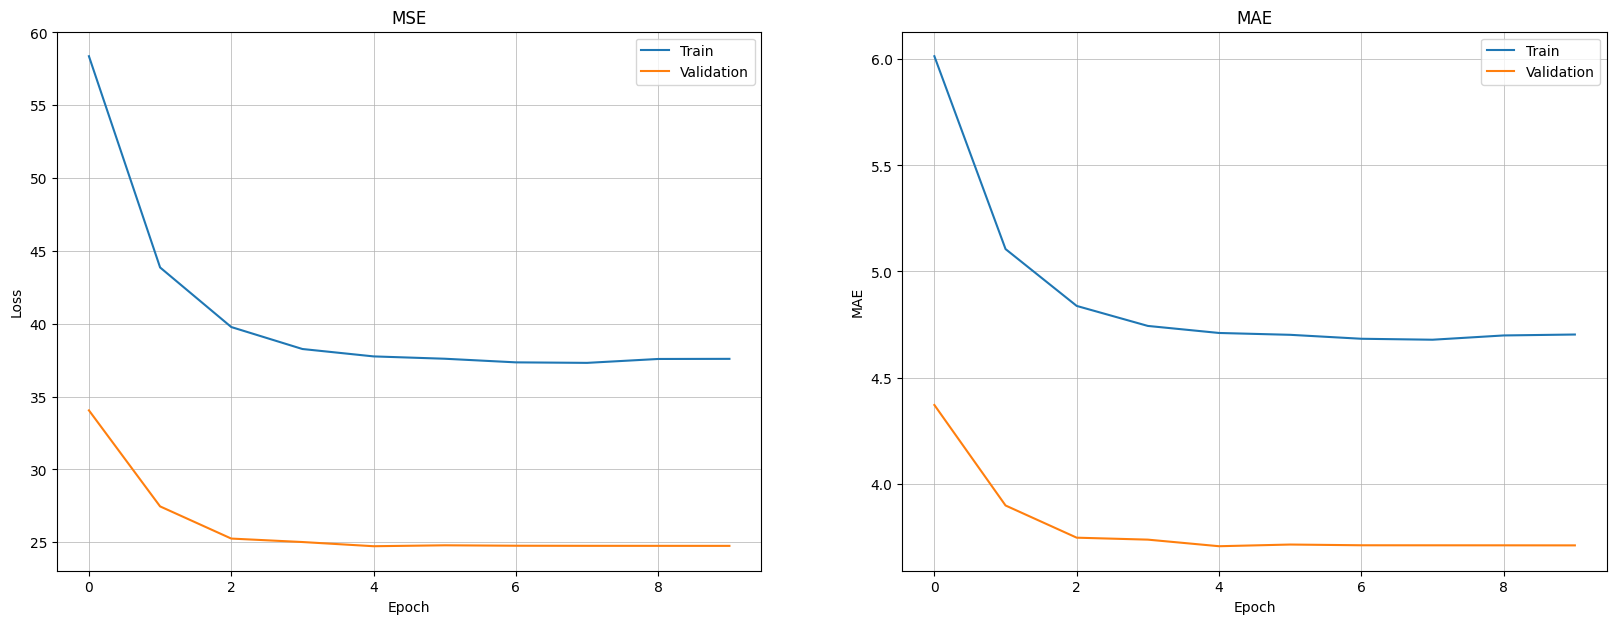

In [57]:
# 2 - Training
# ====================================
model, history = fit_model(model, verbose=1)

plot_history(history);

# 3 - Evaluation
# ====================================
res = model.evaluate(X_test, y_test)
print("-"*50)
print(f"The LSTM MAE on the test set is equal to {round(res[1],2)} Celsius degrees")

## 5.1 Baseline

In [ ]:
TARGET_COLUMN_IDX = 1 # the second column of each fold corresponds to the temperature

def last_seen_value_baseline(X, y):

    # How many values do you want to predict in the future ?
    output_length = y.shape[-1]

    # For each sequence, let's consider the last seen value
    # and only the temperature column
    last_seen_values = X[:,-1, TARGET_COLUMN_IDX].reshape(-1,1)

    # We need to duplicate these values as many times as output_length
    # The author of this notebook did not know how to do it, so they searched on Stackoverflow
    # and found this nice np.repeat in Numpy, which is self-explanatory
    repeated = np.repeat(last_seen_values, axis = 1, repeats = output_length)

    return np.mean(np.abs(y_test - repeated))

In [ ]:
# 1 - Evaluation of the Baseline Model
# ====================================
mae_baseline = last_seen_value_baseline(X_test, y_test)
print(f"- The Baseline MAE on the test set is equal to {round(mae_baseline,2)} Celsius degrees")

# 4 - Comparison with the LSTM model
# ====================================
print(f"- The LSTM MAE on the test set is equal to {round(res[1],2)} Celsius degrees")
print(f"👉 Improvement/decrease of the LSTM model over the baseline (on this fold for the test set) = : {round((1 - (res[1]/mae_baseline))*100,2)} % 👈")

- The Baseline MAE on the test set is equal to 76.63 Celsius degrees
- The LSTM MAE on the test set is equal to 7.14 Celsius degrees
👉 Improvement/decrease of the LSTM model over the baseline (on this fold for the test set) = : 90.68 % 👈


In [ ]:
baseline_model = init_baseline()
baseline_score = baseline_model.evaluate(X_test, y_test)
print(f"- The Baseline MAE on the test set is equal to {round(baseline_score[1],2)} ")

NameError: name 'init_baseline' is not defined

In [ ]:
print(f"- The LSTM MAE on the test set is equal to {round(res[1],2)} Celsius degrees")
print(f"🔥 Improvement of the LSTM model over the baseline (on this fold for the test set) = : {round((1 - (res[1]/baseline_score[1]))*100,2)} % 🔥")

- The LSTM MAE on the test set is equal to 7.16 Celsius degrees
🔥 Improvement of the LSTM model over the baseline (on this fold for the test set) = : 90.65 % 🔥


In [ ]:
# Reminders of the global variables in this notebook

print(f'N_FEATURES = {N_FEATURES}')
print(f'N_TARGETS = {N_TARGETS}')
print('')
print(f'FOLD_LENGTH = {FOLD_LENGTH}')
print(f'FOLD_STRIDE = {FOLD_STRIDE}')
print(f'TRAIN_TEST_RATIO = {TRAIN_TEST_RATIO}')
print('')
print(f'N_TRAIN = {N_TRAIN}')
print(f'N_TEST = {N_TEST}')
print(f'INPUT_LENGTH = {INPUT_LENGTH}')
print(f'OUTPUT_LENGTH = {OUTPUT_LENGTH}')


N_FEATURES = 31
N_TARGETS = 1

FOLD_LENGTH = 8760
FOLD_STRIDE = 728
TRAIN_TEST_RATIO = 0.66



NameError: name 'N_TRAIN' is not defined

In [ ]:
# Remember how many folds do we have ?
folds = get_folds(df, FOLD_LENGTH, FOLD_STRIDE)

print(f"WARNING, we have {len(folds)} FOLDS, so you may want to run the cross-validation of the RNN on Colab.")

WARNING, we have 7 FOLDS, so you may want to run the cross-validation of the RNN on Colab.
